<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/05_transfer_learning_series_of_Transfer_learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets create a series of TransferLearning Experiments we mean models


In [192]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2025-09-22 15:06:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 108.177.11.207, 192.178.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M   196MB/s    in 0.7s    

2025-09-22 15:06:01 (196 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [193]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-22 15:06:01--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-22 15:06:01 (108 MB/s) - ‘helper_functions.py.2’ saved [6733/6733]



In [194]:
import tensorflow as tf

In [195]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [196]:
unzip_data('10_food_classes_1_percent.zip')

In [197]:
train_dir='10_food_classes_1_percent/train'
test_dir='10_food_classes_1_percent/test'

In [198]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'

In [199]:
image_shape=(512,512)

In [200]:
# Data Loader
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=32,image_size=image_shape)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',batch_size=32,image_size=image_shape)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [201]:
# create dataset augmentation stage with horizontal flip, rotation,zoom etc
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    # tf.keras.layers.Rescale(1./255), only for resnet and like models

],name='augmentation-layer')

Visualize Augmented data and also original images

In [202]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

(np.float64(-0.5), np.float64(532.5), np.float64(415.5), np.float64(-0.5))

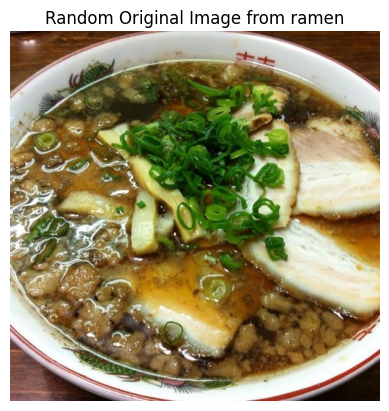

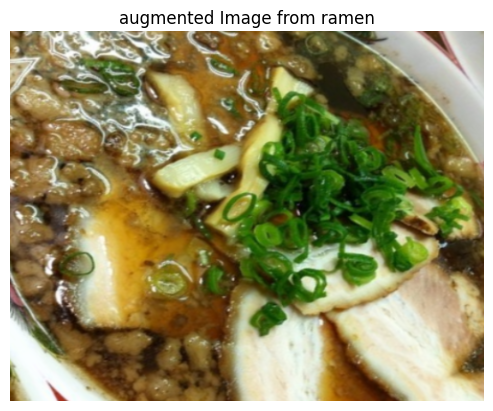

In [203]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf

target_class=random.choice(train_data_1_percent.class_names)
target_dir='10_food_classes_1_percent/train/'+target_class
random_image_name=random.choice(os.listdir(target_dir))
random_image_path=target_dir+'/'+random_image_name

# Load and display the original image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Random Original Image from {target_class}')
plt.axis('off')

# Now lets plot augmented Data
augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f'augmented Image from {target_class}')
plt.imshow(tf.squeeze(augmented_img)/255)
plt.axis('off')

Model 1 Feature extraction transfer learning on 1% of the data

In [204]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [205]:
input_shape=(512,512,3)

In [206]:
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input

In [207]:
inputs=Input(shape=input_shape)
# x=data_augmentation(inputs)
x=base_model(inputs,training=False)
x=GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)
outputs=Dense(10,activation='softmax')(x)

model_1=tf.keras.Model(inputs,outputs)

In [208]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [209]:
model_1.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 16, 16, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GlobalAveragePoolingLayer       │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [210]:
model_1_history=model_1.fit(train_data_1_percent,epochs=5,steps_per_epoch=len(train_data_1_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[create_tensorboard_callback(dir_name="transferlearning",experiment_name="Model1_FE_TF_1PERCENT_data")])

Saving TensorBoard log files to: transferlearning/Model1_FE_TF_1PERCENT_data/20250922-150607
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - accuracy: 0.1001 - loss: 2.4105 - val_accuracy: 0.2007 - val_loss: 2.2141
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2828 - loss: 2.1664 - val_accuracy: 0.3125 - val_loss: 2.0694
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4811 - loss: 1.9475 - val_accuracy: 0.3816 - val_loss: 1.9675
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5364 - loss: 1.7803 - val_accuracy: 0.4391 - val_loss: 1.8915
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6183 - loss: 1.6393 - val_accuracy: 0.4951 - val_loss: 1.7975


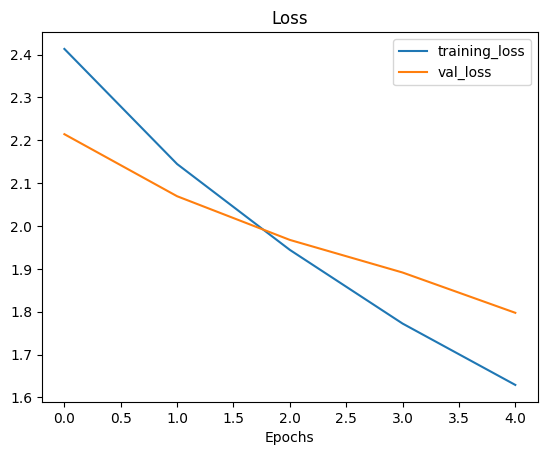

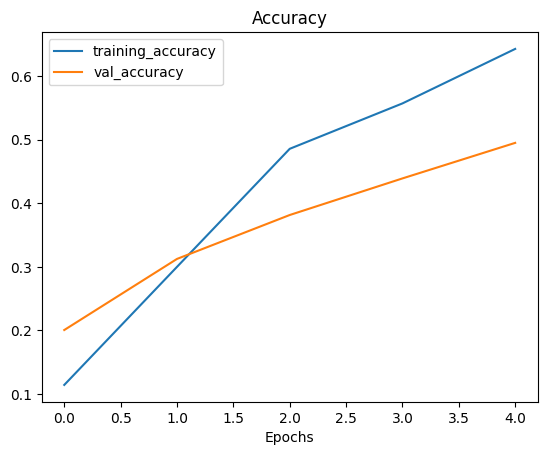

In [211]:
plot_loss_curves(model_1_history)

In [212]:
result_1_percent_data_augmented=model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.4956 - loss: 1.7992


In [213]:
result_1_percent_data_augmented

[1.7982532978057861, 0.5059999823570251]

# **Model 2 data augmentation layer with 10 percent training data**

In [214]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-22 15:07:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   197MB/s    in 0.8s    

2025-09-22 15:07:29 (197 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [215]:
unzip_data("10_food_classes_10_percent.zip")

In [216]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [217]:
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [218]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [219]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',
                                                                          image_size=IMG_SIZE,batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=BATCH_SIZE,image_size=IMG_SIZE,label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [220]:
# Data Augmentation Layer
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.Rescaling(1./255),
],name='data_augmentation_layer')

In [221]:
input_shape=(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable=False

In [222]:
# Correct preprocessing for EfficientNet
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

base_model = EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable = False

inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


In [223]:
model_2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_layer         │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ GlobalAveragePoolingLayer       │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,789,923 (25.90 MB)

 Trainable params: 1,363,770 (5.20 MB)

 Non-trainable params: 2,698,611 (10.29 MB)

 Optimizer params: 2,727,542 (10.40 MB)

# Set CheckPoint to save our models weight during training

In [224]:
check_point_path = "ten_percent_model_checkpoints_weights/checkpoint.weights.h5"

check_point_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=check_point_path,
    save_best_only=False,
    save_weights_only=True,
    save_freq='epoch',
    verbose=1
)


In [225]:
# Fitting and Evaluating Data
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),callbacks=[check_point_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1199 - loss: 0.3258
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.1190 - loss: 0.3259 - val_accuracy: 0.1053 - val_loss: 0.3256
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.1354 - loss: 0.3261
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.1341 - loss: 0.3261 - val_accuracy: 0.1036 - val_loss: 0.3253
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0809 - loss: 0.3265
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.0810 - loss: 0.3265 - val_accuracy: 0.0970 - val_loss: 0.3259
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.1149 - loss: 0.3249
Epoch 4: saving model to ten_percent_model_checkpoints_

In [226]:
# fit and evaluate
res_10_percent_data_aug=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.1052 - loss: 0.3259


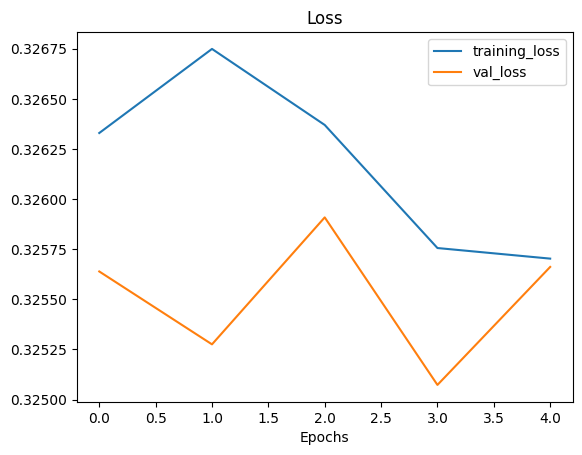

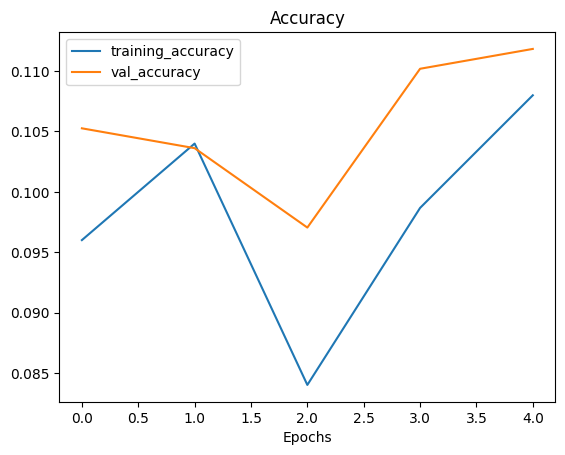

In [227]:
plot_loss_curves(history_10_percent_data_aug)

Loading and comparing saved and trained models weights

In [228]:
model_2.load_weights("/content/ten_percent_model_checkpoints_weights/checkpoint.weights.h5")

In [229]:
loaded_weight_model_results=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.0987 - loss: 0.3261


In [230]:
res_10_percent_data_aug == loaded_weight_model_results

False

In [231]:
res_10_percent_data_aug

[0.3262275457382202, 0.10000000149011612]

In [232]:
loaded_weight_model_results

[0.326227605342865, 0.10000000149011612]

In [233]:
import numpy as np

In [234]:
from ast import Load
np.isclose(np.array(res_10_percent_data_aug),np.array(loaded_weight_model_results))

array([ True,  True])

Lets Now Start Building

# **MODEL 3 : With Fine Tuning**

In [235]:
#layers in model2
model_2.layers

[<InputLayer name=InputLayer, built=True>,
 <Sequential name=data_augmentation_layer, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=GlobalAveragePoolingLayer, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=Output_Layer, built=True>]

In [236]:
# Check If layers are Trainable
for layer in model_2.layers:
    print(layer ,layer.trainable)

<InputLayer name=InputLayer, built=True> True
<Sequential name=data_augmentation_layer, built=True> True
<Functional name=efficientnetb0, built=True> True
<GlobalAveragePooling2D name=GlobalAveragePoolingLayer, built=True> True
<Dropout name=dropout_1, built=True> True
<Dense name=Output_Layer, built=True> True


In [237]:
# Chek how many trainable variables are in base model
print(len(model_2.layers[2].trainable_variables))

19


In [238]:

base_model.trainable = True

# Unfreeze only the last 10 layers, freeze the rest
for layer in base_model.layers[:-10]:
    layer.trainable = False


In [239]:
# Recompile Model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                metrics=['accuracy'])

In [240]:
# Check if layers are trainable
for layernumber , layer in enumerate(model_2.layers[2].layers):
  print(layernumber,layer.name,layer.trainable)

0 input_layer_11 False
1 rescaling_12 False
2 normalization_5 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squ

In [241]:
print(len(model_2.trainable_variables))

21


In [242]:
fine_tune_epochs=initial_epochs+5

In [243]:
fine_tune_epochs

10

In [244]:
# Refit the model

history_fine_tune_10_percent_data_aug=model_2.fit(train_data_10_percent,epochs=fine_tune_epochs,
                                                  steps_per_epoch=len(train_data_10_percent),
                                                  validation_data=test_data,
                                                  validation_steps=int(0.25*len(test_data)),
                                                  initial_epoch=history_10_percent_data_aug.epoch[-1],callbacks=[check_point_callback]
                                                  )

Epoch 5/10
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.1232 - loss: 2.3002
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.1234 - loss: 2.3002 - val_accuracy: 0.1086 - val_loss: 2.3014
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.1071 - loss: 2.3021
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.1068 - loss: 2.3022 - val_accuracy: 0.0938 - val_loss: 2.3028
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.1004 - loss: 2.3080
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.1005 - loss: 2.3081 - val_accuracy: 0.1020 - val_loss: 2.3019
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0979 - loss: 2.3096
Epoch 8: saving model to ten_percent_model_checkpo

In [245]:
res_fine_tune_10_percent=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.0973 - loss: 2.3027


Lets try again to build model3

In [246]:
from tensorflow.keras import Input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

input_shape = (224,224,3)

# Load pretrained EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(include_top=False,
                                                  weights='imagenet')
base_model.trainable = False  # Freeze at first

inputs = Input(shape=input_shape, name='InputLayer')
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D(name='GlobalAveragePoolingLayer')(x)
x = Dropout(0.3)(x)  # regularization
outputs = Dense(10, activation='softmax', name='Output_Layer')(x)

model_2 = Model(inputs, outputs)

model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),  # or SparseCategoricalCrossentropy()
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)
base_model.trainable = True
for layer in base_model.layers[:-20]:  # freeze all except last 20
    layer.trainable = False

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
# Train only the top classifier first
history = model_2.fit(
    train_data_10_percent,
    validation_data=test_data,
    epochs=5,          # small number to warm up top layers
    verbose=1
)


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 602ms/step - accuracy: 0.0736 - loss: 2.3622 - val_accuracy: 0.1000 - val_loss: 2.3369
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 545ms/step - accuracy: 0.1236 - loss: 2.3268 - val_accuracy: 0.1000 - val_loss: 2.3372
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 553ms/step - accuracy: 0.0791 - loss: 2.3623 - val_accuracy: 0.1000 - val_loss: 2.3373
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 357ms/step - accuracy: 0.0892 - loss: 2.3636 - val_accuracy: 0.1000 - val_loss: 2.3390
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 540ms/step - accuracy: 0.1035 - loss: 2.3360 - val_accuracy: 0.1000 - val_loss: 2.3387


In [247]:
# Unfreeze some of the deeper layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:  # freeze all except last 20 layers
    layer.trainable = False

# Recompile with lower learning rate for fine-tuning
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Continue training (fine-tuning)
fine_tune_history = model_2.fit(
    train_data_10_percent,
    validation_data=test_data,
    epochs=10,         # more epochs for fine-tuning
    verbose=1
)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 691ms/step - accuracy: 0.0948 - loss: 2.3577 - val_accuracy: 0.1000 - val_loss: 2.3384
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.1177 - loss: 2.3284 - val_accuracy: 0.1000 - val_loss: 2.3380
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - accuracy: 0.1204 - loss: 2.3088 - val_accuracy: 0.1000 - val_loss: 2.3351
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step - accuracy: 0.1186 - loss: 2.3365 - val_accuracy: 0.1000 - val_loss: 2.3325
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 553ms/step - accuracy: 0.1136 - loss: 2.3506 - val_accuracy: 0.1000 - val_loss: 2.3299
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 551ms/step - accuracy: 0.0945 - loss: 2.3362 - val_accuracy: 0.1000 - val_loss: 2.3275
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 396ms/step - accuracy: 0.0892 - loss: 2.3262 - val_accuracy: 0.1000 - val_loss: 2.3255
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.1007 - loss: 2.3221 - val_accuracy

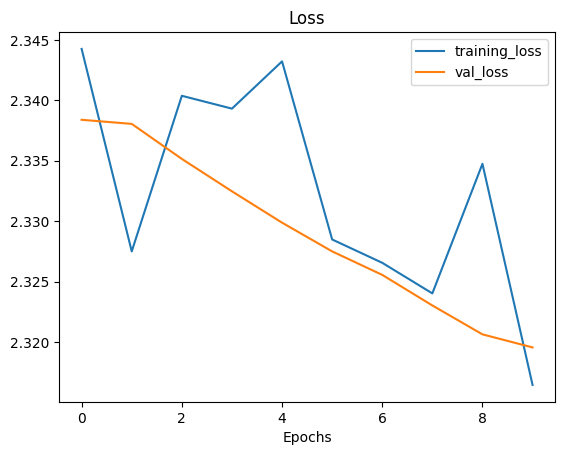

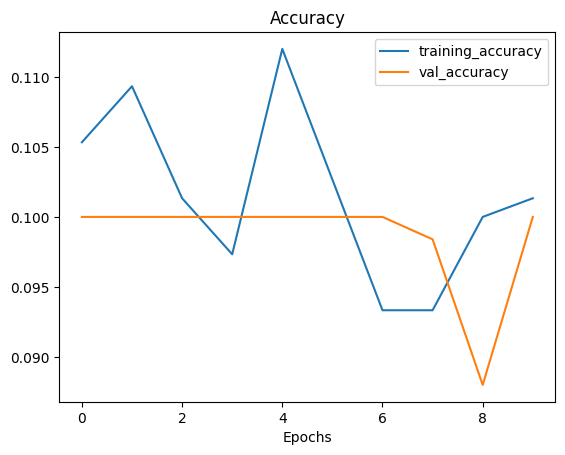

In [248]:
plot_loss_curves(fine_tune_history)

Lets Create a Function to comapre histories

In [273]:
import matplotlib.pyplot as plt

def compare_histories(original_history, new_history, initial_epochs=5):
    # Combine training accuracy
    acc = original_history.history['accuracy'] + new_history.history['accuracy']
    val_acc = original_history.history['val_accuracy'] + new_history.history['val_accuracy']

    # Combine training loss
    loss = original_history.history['loss'] + new_history.history['loss']
    val_loss = original_history.history['val_loss'] + new_history.history['val_loss']

    # Plot Accuracy
    plt.figure(figsize=(8,8))
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.axvline(initial_epochs-1, color='black', linestyle='--', label='Fine-Tuning Starts')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.show()

    # Plot Loss
    plt.figure(figsize=(8,8))
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.axvline(initial_epochs-1, color='black', linestyle='--', label='Fine-Tuning Starts')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.show()


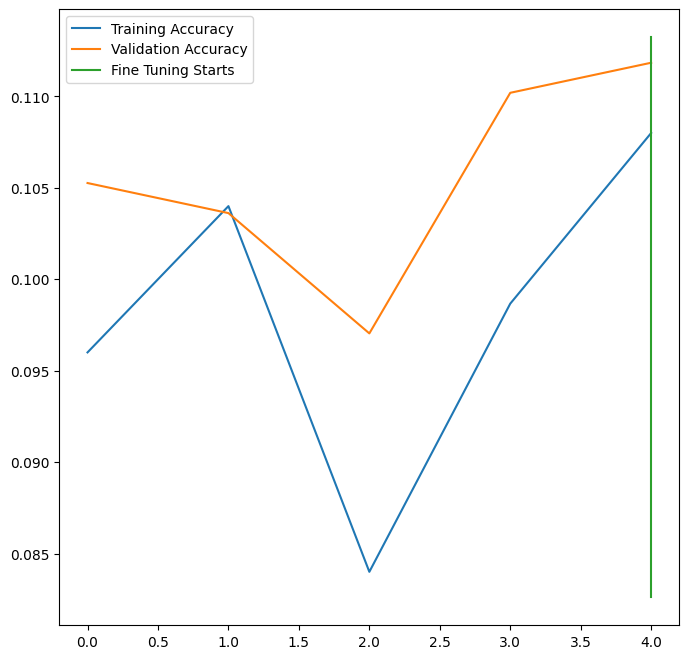

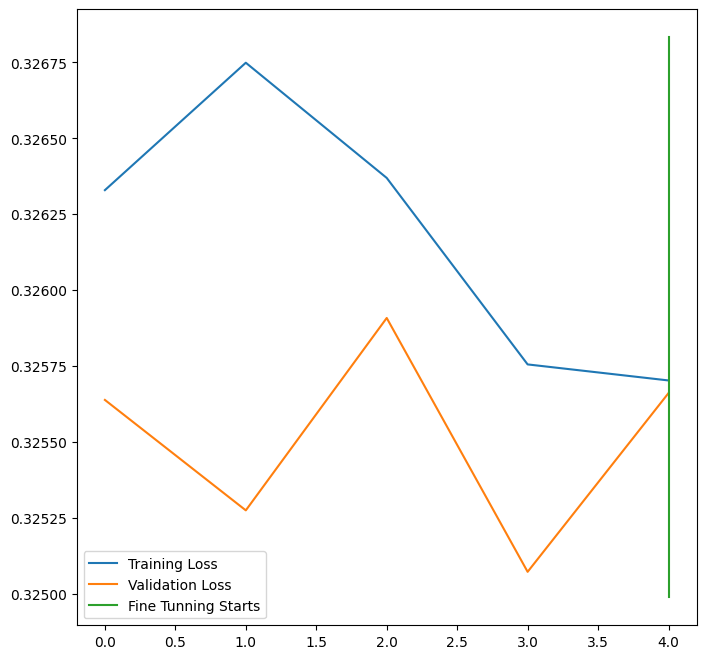

In [250]:
compare_histories(history_10_percent_data_aug,history_fine_tune_10_percent_data_aug)

Lets Now Build Model 4 : 10 food classes 100 % training data

In [251]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-09-22 15:13:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 142.250.98.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  22.1MB/s    in 12s     

2025-09-22 15:13:32 (42.7 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [252]:
unzip_data("10_food_classes_all_data.zip")

In [253]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [254]:
train_dir='10_food_classes_all_data/train'
test_dir='10_food_classes_all_data/test'

In [255]:
train_data_all=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=32,image_size=(224,224))
test_data_all=tf.keras.preprocessing.image_dataset_from_directory(test_dir,label_mode='categorical',batch_size=32,image_size=(224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [256]:
model_2.load_weights(check_point_path)

In [257]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.0975 - loss: 2.3025


[2.3024404048919678, 0.10000000149011612]

In [258]:
res_10_percent_data_aug

[0.3262275457382202, 0.10000000149011612]

In [259]:
for layer_number,layer in enumerate(model_2.layers):
    print(layer_number,layer.name,layer.trainable)

0 InputLayer True
1 data_augmentation_layer True
2 efficientnetb0 True
3 GlobalAveragePoolingLayer True
4 dropout_2 True
5 Output_Layer True


In [260]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
    print(layer_number,layer.name,layer.trainable)

0 input_layer_21 False
1 rescaling_23 False
2 normalization_10 False
3 rescaling_24 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_sq

In [261]:
# Recompile Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [262]:
fine_tune_epochs=initial_epochs+5

In [263]:
history_all_data_fine_tune_epochs=model_2.fit(train_data_all,epochs=fine_tune_epochs,
                                                  steps_per_epoch=len(train_data_all),
                                                  validation_data=test_data,
                                                  validation_steps=int(0.25*len(test_data)),
                                                  initial_epoch=history_10_percent_data_aug.epoch[-1])

Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.1006 - loss: 0.3267 - val_accuracy: 0.0954 - val_loss: 0.3352
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - accuracy: 0.1034 - loss: 0.3262 - val_accuracy: 0.1086 - val_loss: 0.3287
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.1048 - loss: 0.3260 - val_accuracy: 0.0954 - val_loss: 0.3269
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.1090 - loss: 0.3261 - val_accuracy: 0.1299 - val_loss: 0.3272
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.1073 - loss: 0.3259 - val_accuracy: 0.0806 - val_loss: 0.3341
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.0970 - loss: 0.3259 - val_accuracy: 0.0888 - val_loss: 0.3394


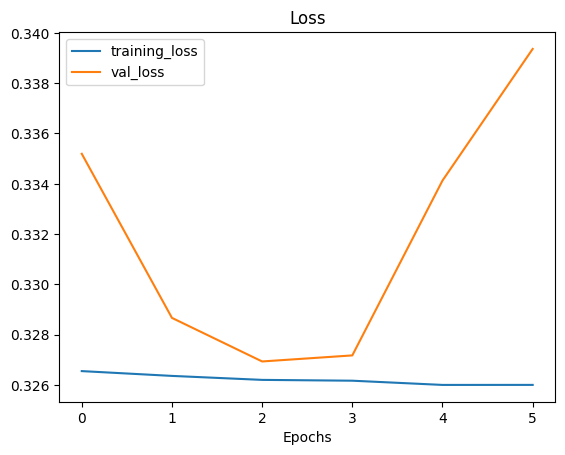

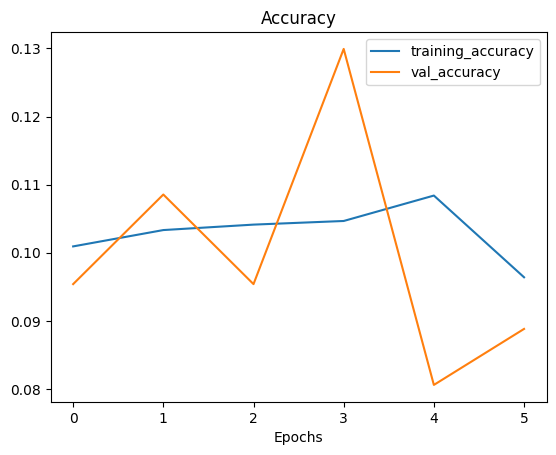

In [264]:
plot_loss_curves(history_all_data_fine_tune_epochs)

In [265]:
# Evaluate on all test data
results_fine_tune_full_data=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.0981 - loss: 0.3383


In [266]:
hist_history_all_data_fine_tune_epochs=model_2.fit(train_data_all,epochs=fine_tune_epochs,
                                                  steps_per_epoch=len(train_data_all),
                                                  validation_data=test_data,
                                                  validation_steps=int(0.25*len(test_data)),
                                                  initial_epoch=model_1_history.epoch[-1])

Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.1062 - loss: 0.3264 - val_accuracy: 0.1283 - val_loss: 0.3291
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.1030 - loss: 0.3257 - val_accuracy: 0.1086 - val_loss: 0.3325
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.1059 - loss: 0.3257 - val_accuracy: 0.0938 - val_loss: 0.3273
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.1036 - loss: 0.3259 - val_accuracy: 0.0970 - val_loss: 0.3269
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.1031 - loss: 0.3256 - val_accuracy: 0.1168 - val_loss: 0.3276
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.1013 - loss: 0.3257 - val_accuracy: 0.1118 - val_loss: 0.3281


In [268]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

# Paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

IMG_SIZE = (224,224)
BATCH_SIZE = 32

# Load datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomHeight(0.2),
], name="data_augmentation")

# Base Model with pretrained weights
base_model = EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable = False   # Phase 1: Freeze base

# Build model
inputs = Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)  # scale to [-1, 1]
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)   # regularization
outputs = Dense(10, activation="softmax")(x)
model = Model(inputs, outputs)

# Compile
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Train Phase 1 (frozen base)
history1 = model.fit(
    train_data,
    validation_data=test_data,
    epochs=5
)

# Fine-tuning Phase 2
base_model.trainable = True
# Unfreeze last 20% of layers
fine_tune_at = int(len(base_model.layers) * 0.8)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # lower LR for fine-tuning
    metrics=["accuracy"]
)

history2 = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  # more epochs for fine-tuning
)

# Evaluate
results = model.evaluate(test_data)
print("Final test accuracy:", results[1])


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 457ms/step - accuracy: 0.1783 - loss: 2.2941 - val_accuracy: 0.6432 - val_loss: 1.5298
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 528ms/step - accuracy: 0.5423 - loss: 1.5588 - val_accuracy: 0.7752 - val_loss: 1.0867
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 533ms/step - accuracy: 0.7372 - loss: 1.1573 - val_accuracy: 0.8108 - val_loss: 0.8642
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step - accuracy: 0.7617 - loss: 0.9653 - val_accuracy: 0.8224 - val_loss: 0.7504
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 520ms/step - accuracy: 0.7760 - loss: 0.8643 - val_accuracy: 0.8352 - val_loss: 0.6698
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 30s 664ms/step - accuracy: 0.5729 - loss: 1.3841 - val_accuracy: 0.8436 - val_loss: 0.5865
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 347ms/step - accuracy: 0.7103 - loss: 1.1058 - val_accuracy: 0.8428 - val_loss: 0.5399
Epoch 3/10
24/24 ━━

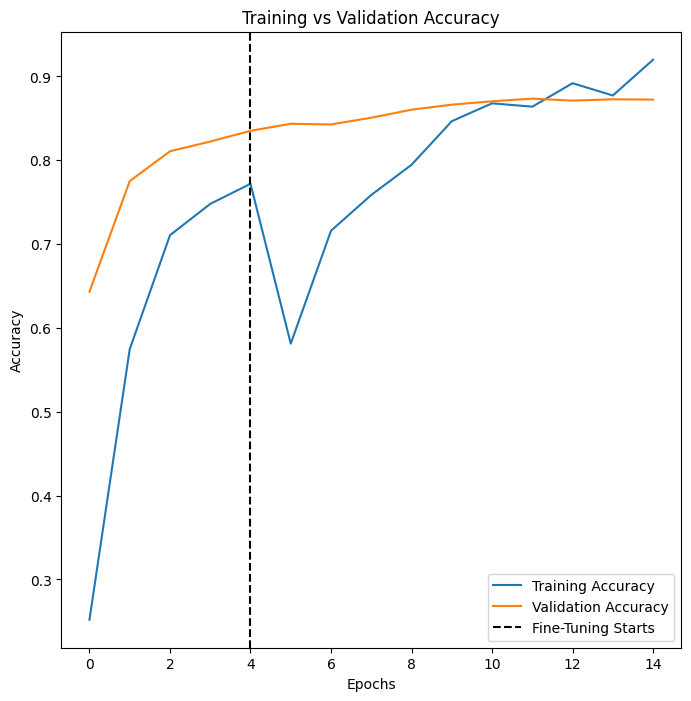

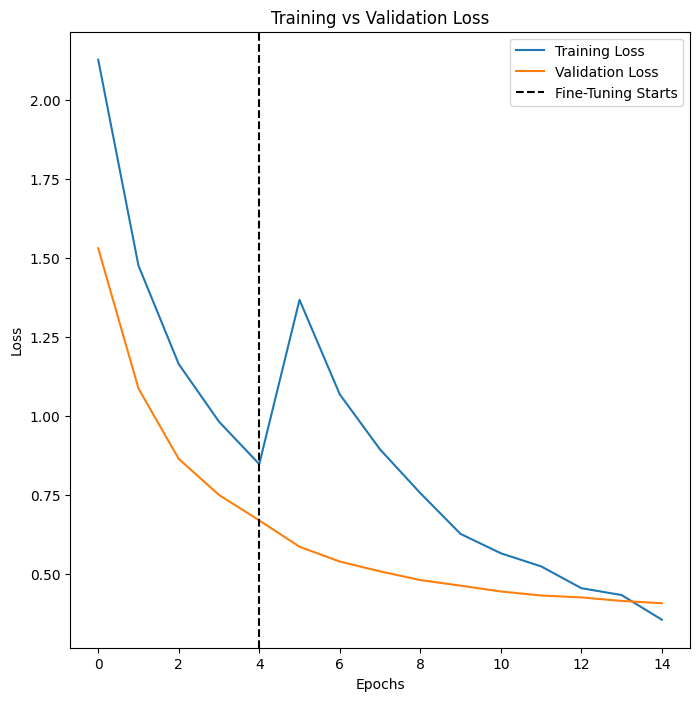

In [274]:
compare_histories(history1,history2,initial_epochs=5)